In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('factbook.db')
q = 'select * from sqlite_master where type="table";'
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
cursor = conn.cursor()
q1 = 'select * from facts limit 5'

In [3]:
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
q2 = 'select MIN(population) as min_p, MAX(population) as max_p, MIN(population_growth) as min_pg, MAX(population_growth) as max_pg from facts'
pd.read_sql_query(q2,conn)

,min_p,max_p,min_pg,max_pg
0,0,7256490011,0.0,4.02


In [5]:
q3 = 'select * from facts where population=0;'
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [6]:
q4='select * from facts where population=7256490011'
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


In [8]:
q5 = '''select population, population_growth, birth_rate, death_rate from facts 
where population != (select MIN(population) from facts) and
population != (select MAX(population) from facts)'''
result = pd.read_sql_query(q5,conn)
result[:5]

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fde2a6518>,
      dtype=object)

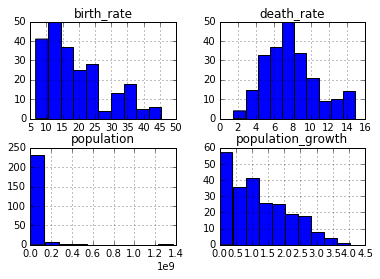

In [9]:
%matplotlib inline
result.hist()

In [11]:
q6 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q6, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926
